In [1]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#importing MNIST dataset for handwritten digit recognition which consists of images with labels
mnist=tf.keras.datasets.mnist

In [3]:
#dividing dataset into training and testing images
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
#size of training images list
x_train.shape

(60000, 28, 28)

In [5]:
#displaying metrics form of first training image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

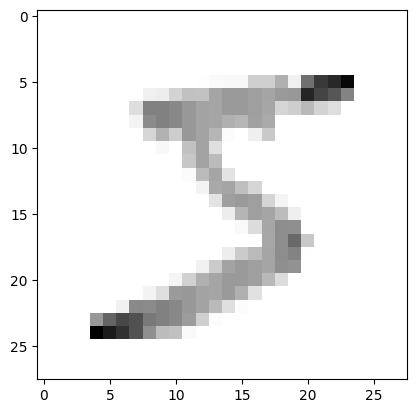

In [6]:
#normalizing and diaplaying first training image
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [7]:
#printing metrics of first training image after normalization
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
#printing label of first training image
print(y_train[0])

5


In [9]:
import numpy as np
img_size=28
x_trainer=np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester=np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training sample dimensions:",x_trainer.shape)
print("Testing sample dimensions:",x_tester.shape)

Training sample dimensions: (60000, 28, 28, 1)
Testing sample dimensions: (10000, 28, 28, 1)


In [10]:
#importing modules 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [11]:
#model creation
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
print("Total training samples=",len(x_trainer))

Total training samples= 60000


In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [15]:
#training the model
model.fit(x_trainer,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.7764 - loss: 0.6784 - val_accuracy: 0.9522 - val_loss: 0.1565
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 49s 37ms/step - accuracy: 0.9626 - loss: 0.1214 - val_accuracy: 0.9651 - val_loss: 0.1189
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9748 - loss: 0.0799 - val_accuracy: 0.9747 - val_loss: 0.0823
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9832 - loss: 0.0567 - val_accuracy: 0.9663 - val_loss: 0.1098
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 35ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9776 - val_loss: 0.0806


In [16]:
#printing accuracy
test_loss, test_acc=model.evaluate(x_tester,y_test)
print("test loss:",test_loss)
print("validation accuracy:",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9741 - loss: 0.0926
test loss: 0.07805443555116653
validation accuracy: 97.75999784469604


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
[[1.5920227e-08 1.6661533e-06 2.9444124e-07 ... 9.9999774e-01
  2.0834363e-10 7.8961349e-08]
 [5.7371955e-07 1.3705247e-05 9.9989998e-01 ... 2.7252172e-06
  4.6161235e-06 1.9552385e-08]
 [1.3349770e-09 9.9999917e-01 3.8506216e-09 ... 5.0982248e-07
  1.4527422e-10 2.9825441e-07]
 ...
 [1.9326487e-08 1.9077386e-06 1.2023484e-07 ... 1.9968356e-07
  1.4085188e-06 5.9109329e-06]
 [3.0283531e-06 2.2223031e-08 7.1786976e-10 ... 2.4346919e-06
  3.7314981e-06 4.6519453e-05]
 [8.8979563e-05 2.5578536e-06 9.1231032e-06 ... 3.6398604e-09
  4.1014548e-05 1.3709756e-06]]
7
7


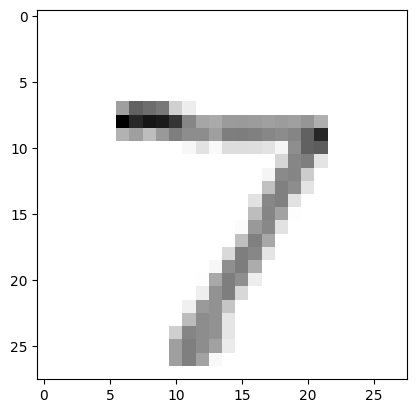

In [17]:
#testing model for random tesing image
predictions=model.predict([x_tester])
print(predictions)
print(np.argmax(predictions[0]))
print(y_test[0])
plt.imshow(x_test[0],cmap=plt.cm.binary)

In [18]:
#testing model for user generated image
import cv2
img=cv2.imread("test_img.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
newimg=tf.keras.utils.normalize(resized,axis=1)
newimg=np.array(newimg).reshape(-1,img_size,img_size,1)
predictions=model.predict(newimg)
print(np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
3
